In [ ]:
# !pip install diffusers accelerate

In [ ]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
%pip install -e .

fatal: destination path 'diffusers' already exists and is not an empty directory.
/content/diffusers
Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.28.0.dev0-0.editable-py3-none-any.whl size=11104 sha256=814583cfc32fa620f78c31f85afaeb5c7acaea57dbe83bf7772c1936bcbce53b
  Stored in directory: /tmp/pip-ephem-wheel-cache-87krf5sa/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.28.0.dev0
    Uninstalling diffusers-0.28.0.dev0:
      Successfully uninstalled diffusers-0.28.0.dev0


In [ ]:
!pwd

/content/diffusers


In [ ]:
%cd examples/dreambooth
!pip install -r requirements_sdxl.txt

/content/diffusers/examples/dreambooth


In [ ]:
!pip install accelerate

In [ ]:
from accelerate.utils import write_basic_config
write_basic_config()

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from diffusers import AutoPipelineForText2Image
# import torch

# pipeline = AutoPipelineForText2Image.from_pretrained(
#     "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16"
# ).to("cuda")

In [ ]:

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_image_table(image_folder, num_cols=4, figsize=(10, 8)):
    images = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            image_path = os.path.join(image_folder, images[i])
            img = mpimg.imread(image_path)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(images[i], fontsize=10)
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()


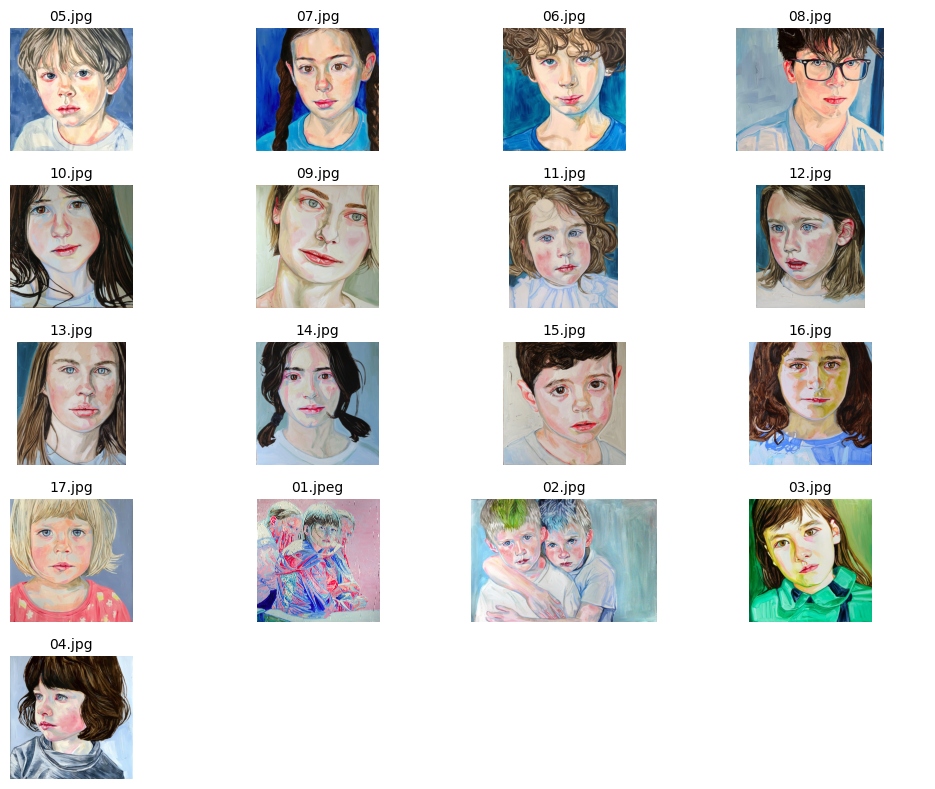

In [ ]:
image_folder = ""
display_image_table(image_folder)

In [ ]:
%env MODEL_NAME=stabilityai/stable-diffusion-xl-base-1.0
%env INSTANCE_DIR=/content/drive/MyDrive/art_test_set
%env OUTPUT_DIR=/content/drive/MyDrive/output_dir
%env VAE_PATH=madebyollin/sdxl-vae-fp16-fix

env: MODEL_NAME=stabilityai/stable-diffusion-xl-base-1.0
env: INSTANCE_DIR=/content/drive/MyDrive/ml_intern_exactlyai/art_test_set
env: OUTPUT_DIR=/content/drive/MyDrive/ml_intern_exactlyai/output_dir
env: VAE_PATH=madebyollin/sdxl-vae-fp16-fix


In [ ]:
%%shell
echo $MODEL_NAME

stabilityai/stable-diffusion-xl-base-1.0


In [ ]:
# !pip install bitsandbytes

In [ ]:
!pwd

/content


In [ ]:
# !pip uninstall torch -y

In [ ]:
# !pip uninstall torchtext -y

In [ ]:
# !pip uninstall torchvision -y

In [ ]:
# !pip uninstall torchaudio -y

In [ ]:
# !pip install torchvision>=0.11

In [ ]:
# !pip install xformers>=0.0.20

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
!pwd

/content/diffusers


In [ ]:
%cd examples/dreambooth

/content/diffusers/examples/dreambooth


In [ ]:
%%shell
accelerate launch train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --pretrained_vae_model_name_or_path=$VAE_PATH \
  --output_dir=$OUTPUT_DIR \
  --mixed_precision="fp16" \
  --instance_prompt="in the style of TOK" \
  --resolution=1024 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --report_to="wandb" \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=2400 \
  --validation_prompt="A TOK girl" \
  --validation_epochs=20 \
  --seed="0" \
  --checkpointing_steps=200 \
  --resume_from_checkpoint="latest" \


2024-05-15 17:27:26.671512: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 17:27:26.671565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 17:27:26.673527: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 17:27:27.668266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
05/15/2024 17:27:29 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1

CalledProcessError: Command 'accelerate launch train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --pretrained_vae_model_name_or_path=$VAE_PATH \
  --output_dir=$OUTPUT_DIR \
  --mixed_precision="fp16" \
  --instance_prompt="in the style of TOK" \
  --resolution=1024 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --report_to="wandb" \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=2400 \
  --validation_prompt="A TOK girl" \
  --validation_epochs=20 \
  --seed="0" \
  --checkpointing_steps=200 \
  --resume_from_checkpoint="latest" \
' returned non-zero exit status 1.

##### Inference

In [ ]:
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pipe.load_lora_weights('/content/drive/MyDrive/output_dir/pytorch_lora_weights.safetensors')
_ = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

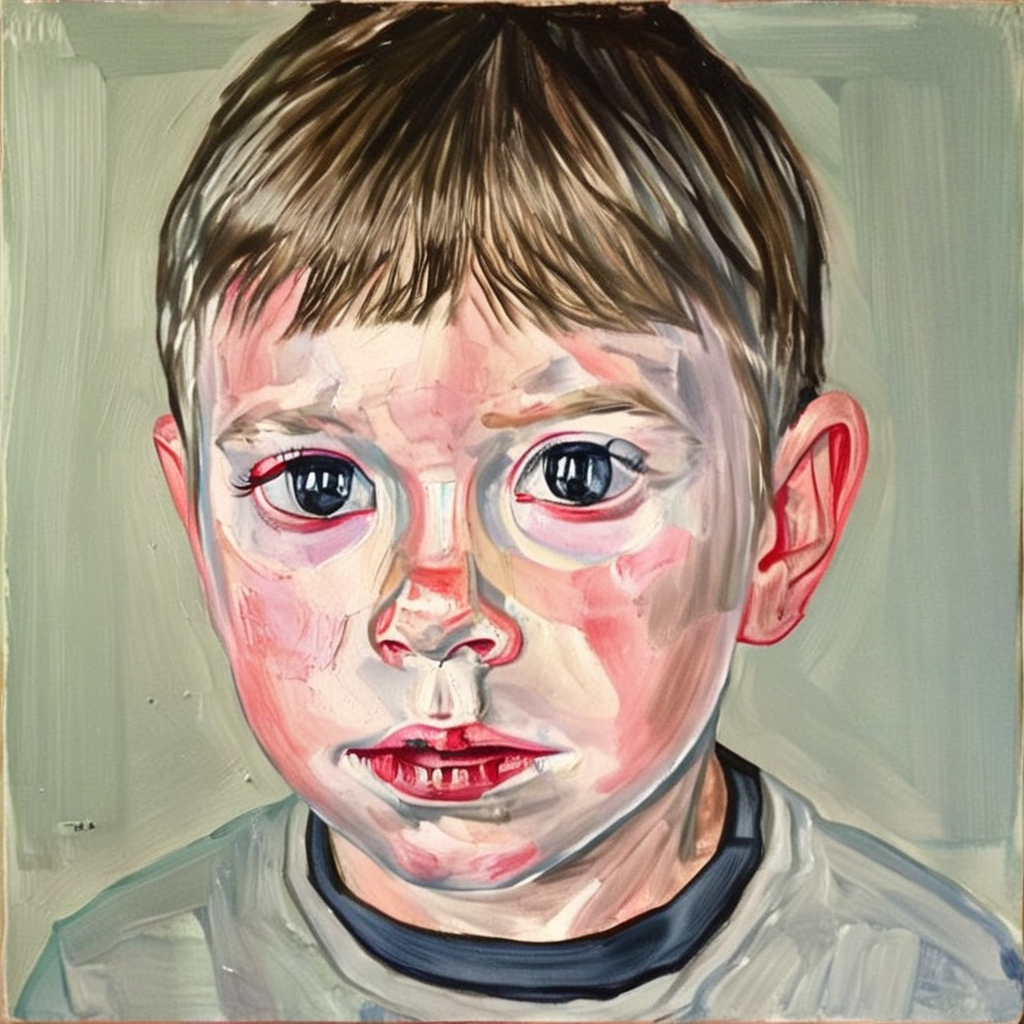

In [ ]:
prompt = "a TOK boy"

image = pipe(prompt=prompt).images[0]
image

In [ ]:
prompt = "a TOK dog"

image = pipe(prompt=prompt).images[0]
image

NameError: name 'pipe' is not defined

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
pipe

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.28.0.dev0",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
pipe.push_to_hub("sdxl_lora_for_portraits")

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.15G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/maxkochanoff/sdxl_lora_for_portraits/commit/2cc5b3531a95d6d00a815629be4d6db1e56779a9', commit_message='Upload StableDiffusionXLPipeline', commit_description='', oid='2cc5b3531a95d6d00a815629be4d6db1e56779a9', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
pipe.push_to_hub("sdxl_lora_for_portraits_v1")

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.15G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/maxkochanoff/sdxl_lora_for_portraits_v1/commit/f268dee9856339f2673c84962afce05a44e0177d', commit_message='Upload StableDiffusionXLPipeline', commit_description='', oid='f268dee9856339f2673c84962afce05a44e0177d', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:


# push to the hub🔥
from train_dreambooth_lora_sdxl import save_model_card
from huggingface_hub import upload_folder, create_repo

repo_id = create_repo("maxkochanoff/sdxl_lora_for_portraits", exist_ok=True).repo_id

# change the params below according to your training arguments
save_model_card(
    repo_id = repo_id,
    images=[],
    base_model="stabilityai/stable-diffusion-xl-base-1.0",
    train_text_encoder=False,
    instance_prompt="in the style of TOK",
    validation_prompt="A TOK girl",
    repo_folder="/content/drive/MyDrive/output_dir",
    vae_path="madebyollin/sdxl-vae-fp16-fix",
    use_dora=False
)

upload_folder(
    repo_id=repo_id,
    folder_path="/content/drive/MyDrive/output_dir",
    commit_message="End of training",
    ignore_patterns=["step_*", "epoch_*"],
)

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

Upload 64 LFS files:   0%|          | 0/64 [00:00<?, ?it/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

events.out.tfevents.1715720371.897dfe02716d.19888.1:   0%|          | 0.00/2.85k [00:00<?, ?B/s]

events.out.tfevents.1715720371.897dfe02716d.19888.0:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

events.out.tfevents.1715724390.0fa4f4d7fd6a.7263.1:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

events.out.tfevents.1715724786.0fa4f4d7fd6a.8874.1:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

events.out.tfevents.1715725063.0fa4f4d7fd6a.9987.1:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

events.out.tfevents.1715724390.0fa4f4d7fd6a.7263.0:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

events.out.tfevents.1715724786.0fa4f4d7fd6a.8874.0:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

events.out.tfevents.1715725063.0fa4f4d7fd6a.9987.0:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/maxkochanoff/sdxl_lora_for_portraits/commit/c6cfa305905a2ceb321b484aa413450b0a40500f', commit_message='End of training', commit_description='', oid='c6cfa305905a2ceb321b484aa413450b0a40500f', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# @markdown Sometimes training finishes succesfuly (i.e. a **.safetensores** file with the LoRA weights saved properly to your local `output_dir`) but there's not enough RAM in the free tier to push the model to the hub 🙁
# @markdown
# @markdown   To mitigate this, run this cell with your training arguments to make sure your model is uploaded! 🤗

# push to the hub🔥
from train_dreambooth_lora_sdxl import save_model_card
from huggingface_hub import upload_folder, create_repo

repo_id = create_repo(repo_id, exist_ok=True).repo_id

# change the params below according to your training arguments
save_model_card(
    repo_id = repo_id,
    images=[],
    base_model="stabilityai/stable-diffusion-xl-base-1.0",
    train_text_encoder=False,
    instance_prompt="a photo of TOK dog",
    validation_prompt=None,
    repo_folder=output_dir,
    vae_path="madebyollin/sdxl-vae-fp16-fix",
)

upload_folder(
    repo_id=repo_id,
    folder_path=output_dir,
    commit_message="End of training",
    ignore_patterns=["step_*", "epoch_*"],
)